# HW-4.1 
## Using docker image [UBSUNY/cp1-hw4](https://hub.docker.com/repository/docker/ubsuny/cp1-hw4)

I am going to use the circuit that was implemented in IBM Lab. This time I am going to use the docker image mentioned above. Using the Jupyter Notebook in Docker image I m going use quiskit to to implement a circuit which can calculate 1+2=3  and than run the simulatot using the [IBM Quantum Computer](https://quantum-computing.ibm.com/lab) remotely.

We are going to use Full Adder to perform our calculation of 1+2= 3   The codes are taken from [Qiskit.org ](https://qiskit.org/textbook/ch-states/atoms-computation.html). 

We could just use half adder but it will not be abble to produce the carry on bit which is why we must use full adder to get both sum and carry on 

To calculate , we need to use 3 qibits for  our input values , 2 qibits as output qubits and 5 classical bits for measurement. 

First we do our necessary imports as follows :  Quantum registers, Classical register and Quantum circuit, numpy etc.

In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

Now I am going to generate the circuit (full adder ) using 5 quantum registers and 2 classical registers. The codes below are taken from [IBM Qiskit](https://qiskit.org/textbook/ch-states/atoms-computation.html) . 

In [3]:
qc_ha = QuantumCircuit(5,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.x(2)
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,3)
qc_ha.cx(1,3)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,4)
qc_ha.barrier()
qc_ha.cx(2,3)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,2,4)
qc_ha.ccx(1,2,4)
qc_ha.barrier()
# extract outputs
qc_ha.measure(3,0) # extract XOR value
qc_ha.measure(4,1) # extract AND value

Lets draw the circuit : 

In [4]:
qc_ha.draw()

┌───┐ ░                 ░                 ░       
q_0: ┤ X ├─░───■─────────■───░────────■────────░───────
     ├───┤ ░   │         │   ░        │        ░       
q_1: ┤ X ├─░───┼────■────■───░────────┼────■───░───────
     ├───┤ ░   │    │    │   ░        │    │   ░       
q_2: ┤ X ├─░───┼────┼────┼───░───■────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┴─┐  │    │   ░ ┌─┐   
q_3: ──────░─┤ X ├┤ X ├──┼───░─┤ X ├──┼────┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └───┘┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐
q_4: ──────░───────────┤ X ├─░──────┤ X ├┤ X ├─░──╫─┤M├
           ░           └───┘ ░      └───┘└───┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════╩══╩═
                                                  0  1

Now I am going to use a real IBM quantum computer to simulate the circuit. For that I need to use my token from my IBM account 
to authenticate the access. 

We now choose a device with the least busy queue which can support our program

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('721674cf0abc1c4d6856b0e4384c3ad72a594211ba6238d49d78a6e03cdd5f4a88c2f6c8c8bbcc09b4f08dc59fd1726aef2dd2e3116d3b344fe8f713acb8bb69')
provider = IBMQ.load_account()

In [10]:
from qiskit.providers.ibmq import least_busy
from qiskit import execute

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_belem


To run the circuit on the backend, we need to specify the number of shots and the number of credits we are willing to spend to run the circuit. Then, we execute the circuit on the backend using the execute function.

In [11]:
from qiskit.tools.monitor import job_monitor
# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 1024
# Maximum number of credits to spend on executions.
max_credits = 3
job_exp = execute(qc_ha, backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

Job Status: job has successfully run


Let's get the result . When the .result() method is called, the code block will wait until the job has finished before releasing the cell. It took me almost 15 minutes to show the result.

In [13]:
result_exp = job_exp.result()

We can plot the result  histogram as follow:

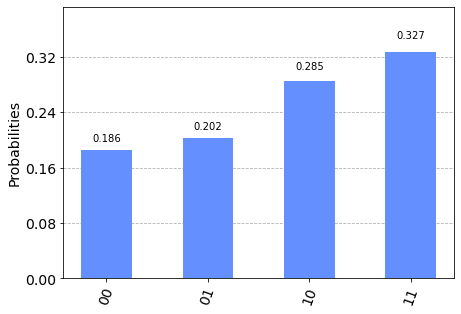

In [16]:
counts_exp = result_exp.get_counts(qc_ha)
plot_histogram(counts_exp)

Even though I was expecting 11 (binary for 3) 100% , there are some other provabilities. But the highest provability is 32% for getting result 11. 

##4.3  
 **Using Pandoc to convert the file into .pdf** 

I run the following command in terminal to convert the .ipynb file to .pdf:

**" pandoc hw_4_1.ipynb -o hw_4_1.pdf "**

![image.png](pandoc_hw4.png)

It successfully converted the jupyter notebook file to a pdf file.